In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)

bottleneck = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, output_layer)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │          50,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
autoencoder.fit(
    x_train, x_train,
    epochs=25,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.3632 - val_loss: 0.1675
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1599 - val_loss: 0.1383
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1356 - val_loss: 0.1252
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1252 - val_loss: 0.1197
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1200 - val_loss: 0.1146
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1152 - val_loss: 0.1108
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1114 - val_loss: 0.1074
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1082 - val_loss: 0.1051
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.1064 - val_loss: 0.1037
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1048 - val_loss: 0.1021
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1036 - val_loss: 0.1008
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


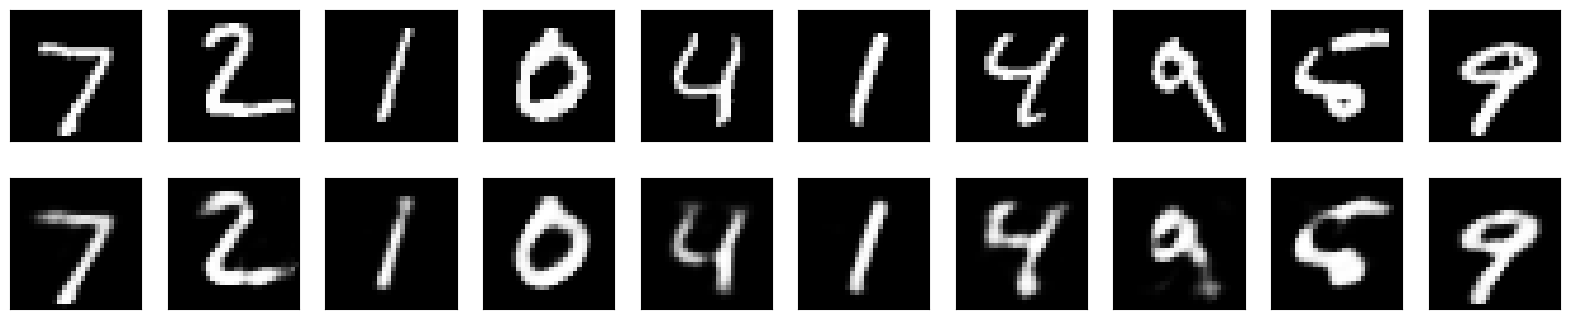

In [5]:
import matplotlib.pyplot as plt

reconstructed = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
